# Data Science, Prediction, and Forecasting - Assignment 5

## Updates in a simple Gaussian model

We use a generative model with a Gaussian prior

$$ p(x) = \mathcal{N}(x; \mu_x, \pi_x^{-1}) = \sqrt{\frac{\pi_x}{2\pi}} \exp \left( - \frac{\pi_x}{2} (x - \mu_x)^2 \right) $$

and a Gaussian likelihood

$$ p(u|x) = \mathcal{N}(u; x, \pi_\varepsilon^{-1}) = \sqrt{\frac{\pi_\varepsilon}{2\pi}} \exp \left( - \frac{\pi_\varepsilon}{2} (u - x)^2 \right). $$

Under this model, the posterior is a Gaussian

$$ p(x|u) = \mathcal{N}(x; \mu_{x|u}, \pi_{x|u}^{-1}) = \sqrt{\frac{\pi_{x|u}}{2\pi}} \exp \left( - \frac{\pi_{x|u}}{2} (x - \mu_{x|u})^2 \right) $$

with

$$ \pi_{x|u} = \pi_x + \pi_\varepsilon, $$

$$ \mu_{x|u} = \mu_x + \frac{1}{\pi_x / \pi_\varepsilon + 1}(u - \mu_x). $$


1. Choose $\mu_x = 0$ and $\pi_x = 0.25$ for your prior and plot it using Python.


In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the Gaussian in terms of mean and precision
def gaussian(x, mu, tau):
    return np.sqrt(tau/2/np.pi) * np.exp(-tau/2*(x-mu)**2)

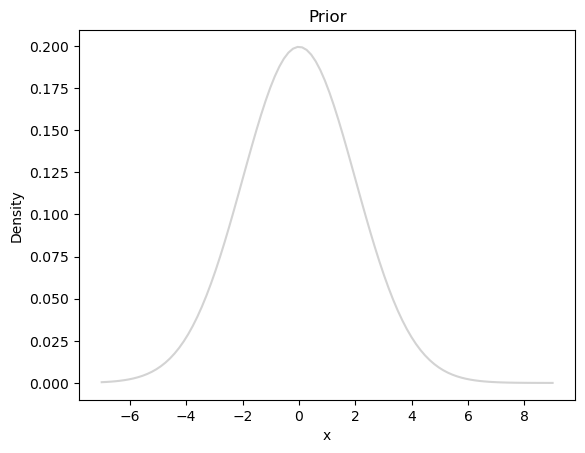

In [3]:
# Plot the prior with mean 0 and precision 0.25 in the range -7 to 9
x = np.linspace(-7, 9, 100)
plt.plot(x, gaussian(x, 0, 0.25), 'lightgray')
plt.title('Prior')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()


2. Use Python to sample a first observation $u_1$ from the sampling distribution $\mathcal{N}(5, 1)$.


In [4]:
# Initialize a vector u of observations
u = np.array([])
# Sample a first observation and append it to the vector u
u = np.append(u, np.random.normal(5, 1))

3. Choose $\pi_\varepsilon = 0.5$ for your likelihood and calculate $\pi_{x|u_1}$ and $\mu_{x|u_1}$ given your likelihood, your prior, and the $u_1$ you have sampled.

In [5]:
# Define a function that calculates the posterior mean and precision
def update(mu_x, pi_x, pi_e, u):
    pi_post = pi_x + pi_e
    mu_post = mu_x + pi_e / pi_post * (u - mu_x)
    return mu_post, pi_post

In [6]:
# Initialize vectors of means mu and precisions pi
mu = np.array([])
pi = np.array([])
# Initial mu and pi are those of the prior
mu = np.append(mu, 0)
pi = np.append(pi, 0.25)

In [7]:
# Calculate the posterior mean and precision
mu_post, pi_post = update(mu[-1], pi[-1], 0.5, u[-1])
print('Posterior mean: ', mu_post)
print('Posterior precision: ', pi_post)


Posterior mean:  3.1919965533172836
Posterior precision:  0.75


In [8]:
# Append the posterior mean and precision to the vectors mu and pi
mu = np.append(mu, mu_post)
pi = np.append(pi, pi_post)

4. Add the resulting posterior $p(x|u_1)$ to the plot of the prior.


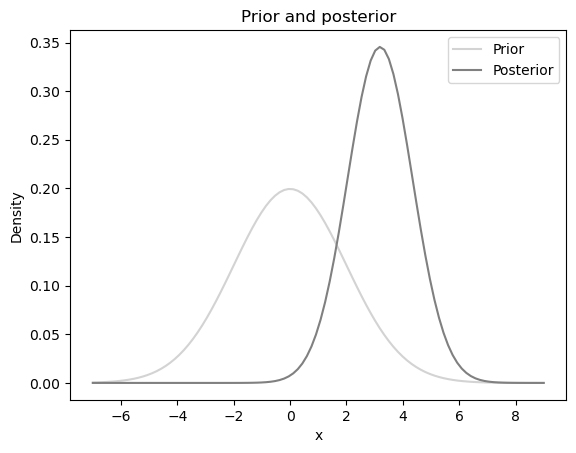

In [9]:
# Add the resulting posterior $p(x|u_1)$ to the plot of the prior.
plt.plot(x, gaussian(x, mu[0], pi[0]), 'lightgray', label='Prior')
plt.plot(x, gaussian(x, mu[1], pi[1]), 'gray', label='Posterior')
plt.title('Prior and posterior')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

5. Now sample $u_2$ from the same sampling distribution and add $p(x|u_1, u_2)$ to the plot.


In [10]:
# Sample 
u = np.append(u, np.random.normal(5, 1))

In [11]:
# Calculate the posterior mean and precision and append them to the vectors mu and pi
mu_post, pi_post = update(mu[-1], pi[-1], 0.5, u[-1])
mu = np.append(mu, mu_post)
pi = np.append(pi, pi_post)

In [12]:
# Create a colour palette ranging from light gray to black
colours = plt.cm.Greys(np.linspace(0.2, 1, len(u) + 1))

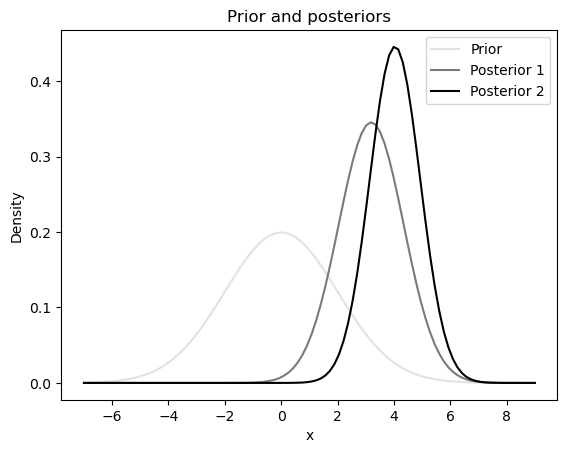

In [13]:
# Plot the prior and the posteriors, label the first posterior as 'Posterior 1', the second as 'Posterior 2', etc.
plt.plot(x, gaussian(x, mu[0], pi[0]), color=colours[0], label='Prior')
for i in range(1, len(u)+1):
    plt.plot(x, gaussian(x, mu[i], pi[i]), color=colours[i], label='Posterior %d' % i, )
plt.title('Prior and posteriors')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


6. Continue adding observations until your posterior precision is greater than 25. What is your posterior standard deviation now? How close is the posterior mean to the mean of the sampling distribution?


In [14]:
# Continue adding observations until the posterior precision is greater than 25
while pi_post < 25:
    u = np.append(u, np.random.normal(5, 1))
    mu_post, pi_post = update(mu[-1], pi[-1], 0.5, u[-1])
    mu = np.append(mu, mu_post)
    pi = np.append(pi, pi_post)

In [15]:
# Calclulate the posterior standard deviation and print it
print('Posterior mean: ', mu_post)
print('Posterior precision: ', pi_post)
print('Posterior standard deviation: ', np.sqrt(1/pi_post))

Posterior mean:  4.944859361727899
Posterior precision:  25.25
Posterior standard deviation:  0.19900743804199783


In [16]:
# How close is the posterior mean to the mean of the sampling distribution?
print('Difference between posterior mean and sampling distribution mean: ', mu_post - 5)

Difference between posterior mean and sampling distribution mean:  -0.055140638272100695


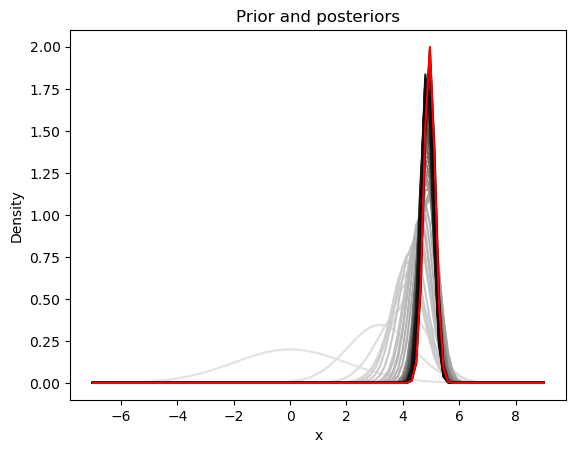

In [17]:
# Plot the prior and the posteriors with the final posterior in red
colours = plt.cm.Greys(np.linspace(0.2, 1, len(u)))
for i in range(0, len(u)):
    plt.plot(x, gaussian(x, mu[i], pi[i]), color=colours[i])
plt.plot(x, gaussian(x, mu[-1], pi[-1]), color='red')
plt.title('Prior and posteriors')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

7. Now make a sudden change to your sampling distribution by using $\mathcal{N}(2, 2)$. Plot what happens to your posterior as you keep sampling from this new distribution. What do you see and why? How would you have to adapt your model so it can better handle changes to the sampling distribution?

In [18]:
# Sample another time as many observations as already made from the new sampling distribution
for i in range(1, len(u)+1):
    u = np.append(u, np.random.normal(2, 2))
    mu_post, pi_post = update(mu[-1], pi[-1], 0.5, u[-1])
    mu = np.append(mu, mu_post)
    pi = np.append(pi, pi_post)

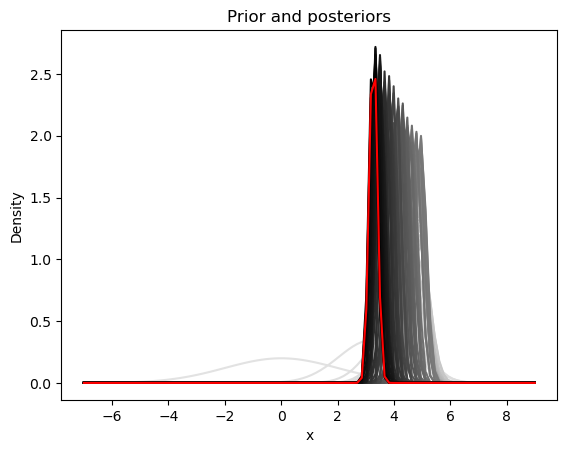

In [19]:
# Replot the prior and the posteriors
colours = plt.cm.Greys(np.linspace(0.2, 1, len(u)))
for i in range(0, len(u)):
    plt.plot(x, gaussian(x, mu[i], pi[i]), color=colours[i])
plt.plot(x, gaussian(x, mu[-1], pi[-1]), color='red')
plt.title('Prior and posteriors')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

We see that our algorithm cannot adjust to the change in sampling distribution because it is based on the assumption of a stationary sampling distribution. With a wide prior at the start, it was easily able to infer the mean of the first sampling distribution very exactly. However, once it has learned this mean, it cannot easily unlearn it when the sampling distribution changes. Even after making another time as many observations as under the new distribution as under the old, the posterior mean is still very far from the new sampling distribution's mean in terms of posterior standard deviations.

In order better to handle such situations, the algorithm would need a mechanism to distinguish between older and newer observations so that it can give more weight to more recent information and discard information that has become obsolete.